Enter product names separated by commas (e.g., iphone, perfume, oneplus):
iphone,perfume,redmi


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


✅ Trend data saved as: trends_data.csv

📊 Real-Time Google Trends Data (Last 5 Days):

            iphone  perfume  redmi
date                              
2025-07-19      85       21     28
2025-07-20     100       23     31
2025-07-21      81       17     27
2025-07-22      80       18     25
2025-07-23      71       16     26
✅ Trend chart saved as: trend_chart.png


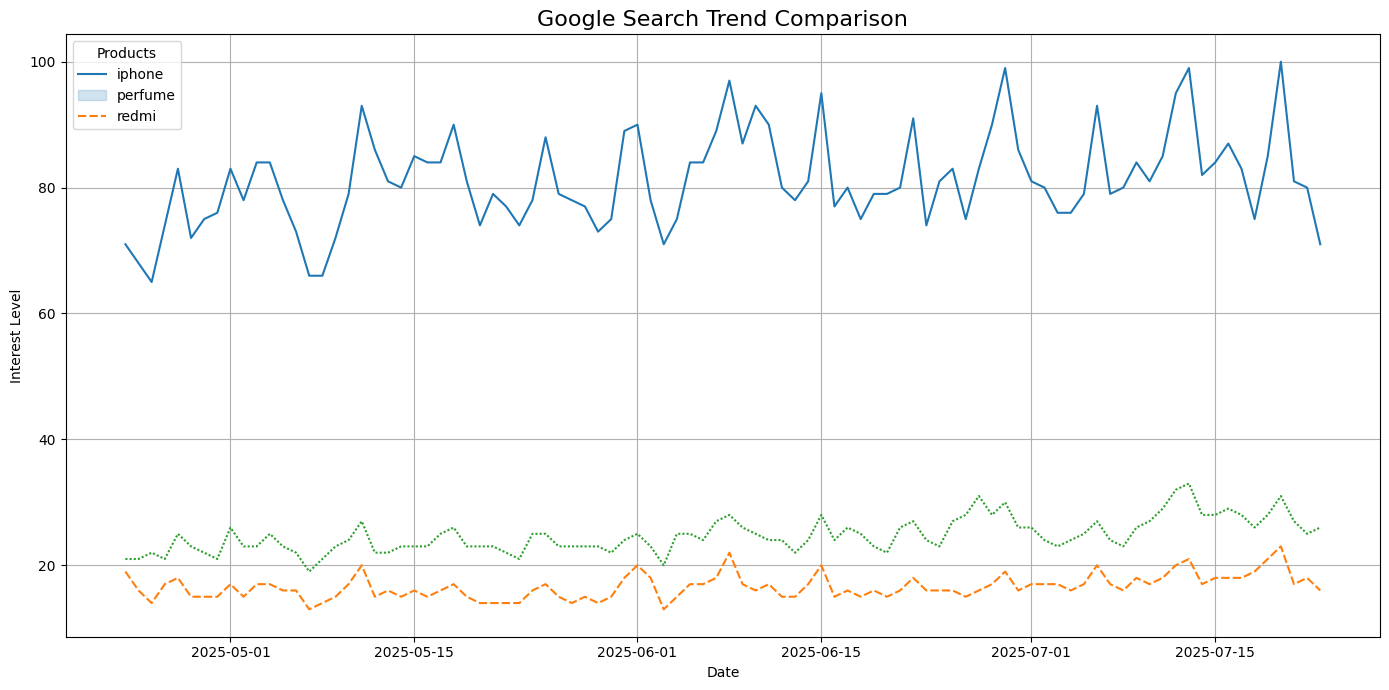

In [4]:
# Install pytrends
!pip install pytrends

# 📚 Import libraries
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔌 Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=330)

# 🔤 User Input
user_input = input("Enter product names separated by commas (e.g., iphone, perfume, oneplus):\n")
keywords = [kw.strip() for kw in user_input.split(",")]

# ⚠️ Limit to 5 keywords
if len(keywords) > 5:
    print("⚠️ Warning: Google Trends allows only 5 keywords at once.")
    keywords = keywords[:5]

# 📡 Build query
pytrends.build_payload(keywords, cat=0, timeframe='today 3-m', geo='IN', gprop='')

#iphonGet interest over time
data = pytrends.interest_over_time()

#Clean data
if 'isPartial' in data.columns:
    data = data.drop(columns=['isPartial'])

#Save data to CSV
csv_filename = "trends_data.csv"
data.to_csv(csv_filename)
print(f"✅ Trend data saved as: {csv_filename}")

#Show last 5 days
print("\n📊 Real-Time Google Trends Data (Last 5 Days):\n")
print(data.tail())

# Plot trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=data)
plt.title('Google Search Trend Comparison', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Interest Level')
plt.grid(True)
plt.legend(data.columns, title='Products')
plt.tight_layout()

# Save chart as image
image_filename = "trend_chart.png"
plt.savefig(image_filename)
print(f"✅ Trend chart saved as: {image_filename}")

# Show plot
plt.show()
